In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/file/d/1lNOfBKK9ZD9oi093naZdfliKCezFV5hP/edit'
output = 'train_snli.txt'

gdown.download(url, output, quiet=False)

/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1lNOfBKK9ZD9oi093naZdfliKCezFV5hP/edit
To: /content/train_snli.txt
71.4kB [00:00, 29.2MB/s]


'train_snli.txt'

In [ ]:
#Importing relevant libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
#Reading the Document

def read_docu(file):
    
    all_words = []
    
    with open(file, "r", encoding = "utf-8") as input_file:
        for line in input_file:
            line = line.lower()
            line = line.strip().split()
            all_words += line
        return(all_words)

In [ ]:
#Counting number of occourences of each distinct word in the document

def word_counter(all_words):
    
    word_count = Counter()
    for word in all_words:
        word_count[word] += 1
    return(word_count.values())

In [ ]:
#Word Rank vs Frequency of occourence analysis Plot

def draw_zipfian_curve(word_count):
    plt.plot(sorted(word_count, reverse = True), marker = "o")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("log(Rank)")
    plt.ylabel("log(Frequency)")
    plt.show()

In [ ]:
def zipfian_plot(file):
    word_corpus = read_docu(file)
    counts = word_counter(word_corpus)
    draw_zipfian_curve(counts)

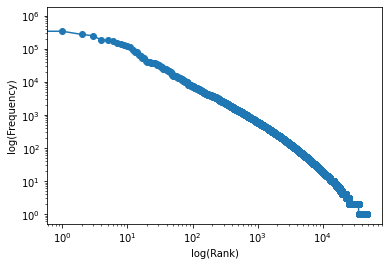

In [ ]:
zipfian_plot("/content/drive/MyDrive/train_snli.txt")

In [ ]:
#Making a list of all Sentence pairs
df= pd.read_csv('/content/drive/MyDrive/train_snli.txt', sep='\t', error_bad_lines=False)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,A person on a horse jumps over a broken down airplane.,"A person is at a diner, ordering an omelette.",0
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
4,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1


In [ ]:
df.isnull().sum()

A person on a horse jumps over a broken down airplane.    0
A person is at a diner, ordering an omelette.             4
0                                                         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
#creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer  
max_features = 500 # max_features dimension reduction 
count_vectorizer = CountVectorizer(stop_words = "english",max_features = max_features) 
review_list = df.iloc[:,1]


# stop_words parameter = automatically remove all stopwords 
# lowercase parameter 
# token_pattern removing other karakters like .. !

sparce_matrix1 = count_vectorizer.fit_transform(df.iloc[:,0]).toarray()
sparce_matrix2 = count_vectorizer.fit_transform(df.iloc[:,1]).toarray()

X = np.concatenate((sparce_matrix1, sparce_matrix2), axis=1)
print(X.shape)

print("Most used {} words: {}".format(max_features,count_vectorizer.get_feature_names()))

#sparce matrix includes independent variable

(367368, 1000)
Most used 500 words: ['adult', 'adults', 'air', 'airplane', 'animal', 'animals', 'area', 'arms', 'art', 'artist', 'asian', 'asleep', 'audience', 'away', 'baby', 'background', 'bag', 'bald', 'ball', 'balloon', 'band', 'bar', 'baseball', 'basketball', 'bath', 'beach', 'bed', 'beer', 'bench', 'bicycle', 'big', 'bike', 'biker', 'bikes', 'bird', 'birds', 'black', 'blond', 'blonde', 'blue', 'board', 'boat', 'body', 'book', 'bowling', 'box', 'boy', 'boys', 'break', 'bridge', 'bright', 'brown', 'building', 'bull', 'bunch', 'bus', 'business', 'busy', 'buying', 'cafe', 'cake', 'camera', 'cap', 'car', 'carrying', 'cars', 'cart', 'cat', 'catch', 'cats', 'chair', 'chases', 'chasing', 'child', 'children', 'church', 'city', 'class', 'classroom', 'clean', 'cleaning', 'climbing', 'clothes', 'clothing', 'clown', 'coat', 'coffee', 'cold', 'colored', 'computer', 'concert', 'construction', 'cooking', 'corner', 'costume', 'couch', 'couple', 'court', 'covered', 'cowboy', 'cream', 'crossing', '

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y = df['0']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train.shape, y_train.shape

((257157, 1000), (257157,))

Random Forest Classifier

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier



clf_Rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = clf_Rf.predict(X_test)

In [ ]:
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])

Accuracy:  0.6172160673616971


SVM Classifier

In [ ]:
#SVM CLassifier

from sklearn.svm import LinearSVC

clf_SVM = LinearSVC(random_state=0, tol=1e-5, dual = False)
clf_SVM.fit(X_train, y_train)

In [ ]:
y_pred = clf_SVM.predict(X_test)

In [ ]:
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])

Decision Trees Classifier

In [ ]:
#Decision Trees Classifier

from sklearn import tree

clf_DT = tree.DecisionTreeClassifier()
clf_DT = clf_DT.fit(X_train, y_train)

In [ ]:
y_pred = clf_DT.predict(X_test)
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])

Neural Network Based Classifier

In [ ]:
#NN Classifier

from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_NN = clf_NN.fit(X_train, y_train)

In [ ]:
y_pred = clf_NN.predict(X_test)
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])

Nearest Neighbours

In [ ]:
#Nearest Neighbours Classifier

from sklearn.neighbors import NearestCentroid

clf_neighbour = NearestCentroid()
clf_neighbour.fit(X_train, y_train)

In [ ]:
y_pred = clf_neighbour.predict(X_test)
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])

Stochastic Gradient Descent

In [ ]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

clf_SG = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf_SG.fit(X_train, y_train)

In [ ]:
y_pred = clf_SG.predict(X_test)
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])

Naive Bayes Classifier

In [ ]:
# Naive Bayes Classifier - Took too long to run on our dataset

# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
y_pred = nb.predict(X_test)
print('Accuracy: ', np.sum(y_pred == y_test)/X_test.shape[0])